### Question 1
 This exercise builds on what we did in chapter 2 of the statistics book. We want to generate a test (with correct size, and ideally admirable power) for testing a *composite* distribution (defined in chapter 2, and you can find it again, in more detail, in chapter 6).
 
 In particular, we take the null to be (symmetric) location-scale student t (with degrees of freedom df = 3, 6, and 12), and will use the KD and AD statistics.
 
 Obviously, first you need to determine the 0.01, 0.05, and 0.10 cutoff values, for each of KD and AD, for a particular sample size, for which you use 30, 60, 100. Make nice tables like in my book of the cutoff values.
 
 What is a bit annoying about this test for Student t is that it has not just location and scale, but also the shape parameter df (the degrees of freedom parameter). So, we probably will have the issue that the test cutoff values, for a given sample size, *might also depend on df*. So, you please make tables (each for the three usual alpha-size values, and the sample sizes indicated above) for several df values, say 3, 6, and 12.
 
 Ideally, the cutoff values would be uniform (the same) across df, but I bet they will not be. (I believe there is an invariance aspect to location and scale terms, so you can do the simulations just taking location zero, and scale one, but YOU MUST also treat them as unknown, meaning, they get estimated --- we want a composite test!)
 
 Confirm the size of the KD and AD tests via another simulation (using a different seed value than the one you used to construct the cutoff-value tables), again needing to do this for the 3 df values, if we regretfully find that the cutoff values are dependent on them. Welcome to real life...
 
 The alternatives are location-scale (i) Gaussian, and (ii) Laplace. Note these two distributions do not have further shape parameters, just location and scale. You will obviously need to be able to simulate from Gaussian -- that is easy, as it is built-in to all software packages, but also for Laplace -- you figure out how to do this, and can use my "fundamental probability" book for help if needed.
 
 Produce power curves like in my book, for the 3 sample sizes, the two alternatives (Gaussian and Laplace), and possibly for the 3 df values, if as said, the cutoff values regretfully vary across this shape parameter.

 ### Key Equations
 For the empirical cdf $\hat{F}_{emp}(t) = \frac{1}{n} \sum\limits_{i=1}^{n}\mathbb{1}_{\{X_i \le t\}}(\omega)$ and n-dimensional random variable $\mathbf{X} = (X_1, ..., X_n)$ representing data of sample size n with $X_i$ being i.i.d, the Kolmogorov-Smirnov Distance and Anderson-Darling test can be used to evaluate whether a supposed distribution function $F_X(t)$ is a good fit to the data. The statistics are given by# 
 1. Kolmogorov-Smirnov Distance (KD) test statistic

 $$\text{KD}(\mathbf{X}) = \max\limits_{i} |\hat{F}_{emp}(X_i) - F_X(X_i)|$$
 
 2. Anderson-Darling test statistic
 
 $$\text{AD}(\mathbf{X}) = \max\limits_{i} \frac{|\hat{F}_{emp}(X_i) - F_X(X_i)|}{\sqrt{F_X(X_i)(1-F_X(X_i))}}.$$
 
 
 
 The null hypothesis for this investigation is taken to be the location-scale t-distribution, given as follows:
 
 1. Student's t-distribution
 
 Has parameter $\nu =$ degrees of freedom. A random variable $T$ has Student's t-distribution with $\nu$ degrees of freedom if $T \sim t_\nu$.
 
 2. Location-scale t-distribution
 
 The generalised form of the Student's t-distribution includes a scale parameter, $\sigma$, and location parameter $\mu$. If A random variable $X$ has a location-scale t-distribution of $\nu$ degrees of freedom with scale parameter $\tau$ and location parameter $\mu$ if $X \sim \mu + \sigma T$. With probability density,
 
 $$f(x; \nu, \mu, \sigma) = ,$$
 
 and distribution function
 
 $$F_X(x) = $$
 


In [1]:
## Imports and parameters
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
from scipy import integrate
from scipy import special
from collections import Counter

# cutoff values
alphas = np.array([0.01, 0.05, 0.1])

# sample sizes
ns = np.array([30, 60, 100])

# degrees of freedom
dfs = np.array([3, 6, 12])

mu = 0
sig = 1

In [2]:
## Functions for ecdf and the KD & AD statistics

'''
Kolmogorov Smirnov Distance Test Statistic

Inputs:
    - ecdf_y = empirical cdf values
    - cdf_y = H0 (fitted) cdf values
Output:
    - KD = KD statistic value
'''
def KD(ecdf_y, cdf_y):
    KD = max(abs(ecdf_y - cdf_y))
    #print(f'KD: {KD}')
    return KD

'''
Anderson Darling Test Statistic

Inputs:
    - ecdf_y = empirical cdf values
    - cdf_y = H0 (fitted) cdf values
Output:
    - AD = AD statistic value
'''
def AD(ecdf_y, cdf_y):
    AD = max(abs(ecdf_y - cdf_y) / np.sqrt(cdf_y * (1 - cdf_y)))
    #print(f'AD: {AD}')
    return AD

'''
Negative Log likelihood of the location scale student's t distribution

Note: Required to calculate the maximum likelihood estimates of mu and sig (negative log likelihood is minimized)

Inputs:
    - params = [mu, sig, df], a list of the location and scale parameter to be optimized.
    - df = fixed degrees of freedom
    - x = known data sample
Output:
    - log likelihood value
'''
def lst_loglikelihood(params, x): #df and x given, unknown params
    mu = params[0]
    sig= params[1]
    df = params[2]
    
    K = special.beta(df/2, 0.5) * np.sqrt(df)
    z = (x - mu) / sig
    
    ll = -np.log(sig) - np.log(K) -((df + 1) / 2) * np.log(1 + z**2 / df)
    ll = -np.sum(ll)
    
    return ll 
    


df = 3
n = 30


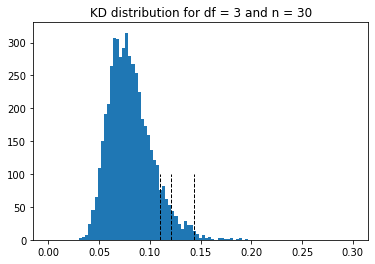

AD values above 2: 0


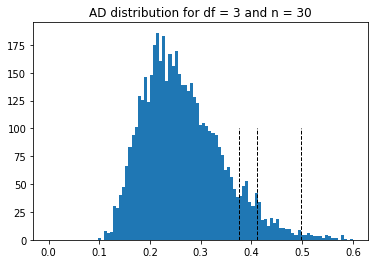

Average MLEs for mu, sig, and df: [-4.25214341e-03  1.02670345e+00  6.27464204e+01]
n = 60


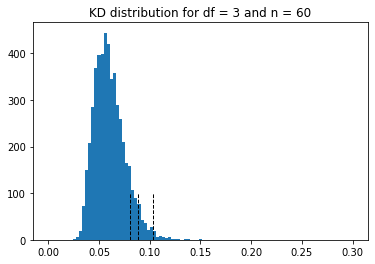

AD values above 2: 0


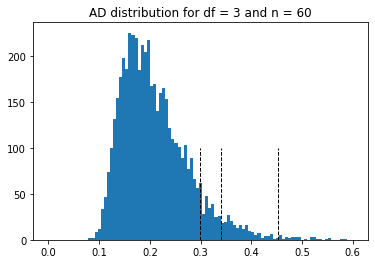

Average MLEs for mu, sig, and df: [7.81475916e-04 1.02113326e+00 1.59064527e+01]
n = 100


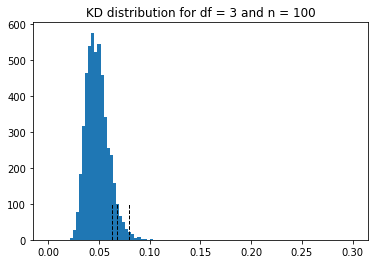

AD values above 2: 1


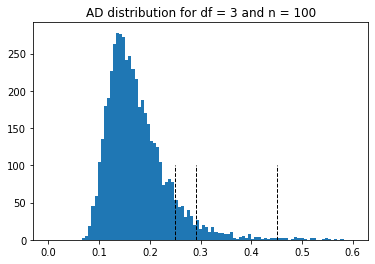

Average MLEs for mu, sig, and df: [2.41909837e-04 1.01246521e+00 6.36388305e+00]
df = 6
n = 30


KeyboardInterrupt: 

In [3]:
np.random.seed(5)

mu = 0
sig = 1
it = 5000

'''
Steps to get critical cutoff values: Simulation to generate KD and AD
distributions under H0.

For each fixed sample size n = 30, 60, 100 and fixed degree of freedom 
df = 3, 6, 12:
    1. set scale = 1, loc = 0 for simulation using specified df 
       (must estimate loc and scale later in mle lst fit - composite hypothesis)
    2. generate 5000 simulated datasets of size n from the distribution
       lst(df, loc = 0, scale = 1)
    3. calculate KD and AD for each dataset for each simulation
        3.1 ecdf calculation implemented in KD and AD functions
        3.2 The HO cdf, however, is given by the MLE fitted lst distribution 
            lst(df, loc = mu_mle, scale= sig_mle). Note that df is fixed to test
            if the critical values are dependent on it.
    4. calculate the right quantiles for alpha = 0.01, 0.05, 0.1 (i.e. more extreme KD and AD is a higher value)
    5. record these cutoff values
    
Note that occasionally an error is thrown where the log likelihood is too large, taking log(small value), but this is fine: the
previous, 'best estimate' value is used instead and returns a result very similar to other numerical schemes (I tested this).
'''

# for all different n and df
KD_critvals = {}
AD_critvals = {}

for df in dfs:
    print(f'df = {df}')
    for n in ns:
        print(f'n = {n}')
        KD_df_n = np.array([])
        AD_df_n = np.array([])
        
        ind = np.arange(1, n+1)
        ecdf_y = (ind - 3/8) / (n + 1/4) # (ind - 1/2) / n
        
        
        mles=[]
        
        
        # simulate it times for each (df, n) pair
        for i in range(it):
            # ith dataset generated from H0 distribution with df d.o.f.
            s = stats.t.rvs(df, loc = mu, scale = sig, size = n)
            s = np.sort(s)
            
            # No closed formed expression for MLEs. Numerically optimize:
            bounds = [(-np.inf, np.inf), (1e-5, np.inf), (1e-5, np.inf)]
            params0 = [0, 1, df]
            res = optimize.minimize(lst_loglikelihood, params0, method='L-BFGS-B', args=s, bounds=bounds, tol=1e-6)
            
            # trust-constr, cobyla, bfgs
                
            # MLEs
            mu_mle, sig_mle, df_mle = res.x
            
            
            
            mles.append(res.x)
            
            
            
            # Fitted student's t distribution
            cdf_y = stats.t.cdf(s, df = df_mle, loc = mu_mle, scale = sig_mle)
            #print(f'cdf_y: {cdf_y}')
            
            # ith KD statistic
            KD_i = KD(ecdf_y, cdf_y)
            KD_df_n = np.append(KD_df_n, KD_i)
            
            # ith AD statistic
            AD_i = AD(ecdf_y, cdf_y)
            AD_df_n = np.append(AD_df_n, AD_i)
            
        # Continue for (df,n) case
        
        # Get alpha level quantiles of KD/AD for (df,n)
        # sort
        KD_df_n = np.sort(KD_df_n)
        AD_df_n = np.sort(AD_df_n)
        
        #print(f'KD and ADs for {df, n}: \n')
        #print(KD_df_n)
        #print(AD_df_n)
        
        # get .99, .95, and .90 quantiles
        KD_df_n_critvals = np.quantile(KD_df_n, 1-alphas) 
        AD_df_n_critvals = np.quantile(AD_df_n, 1-alphas)
        
        # append to critvals
        KD_critvals[f'{df},{n}'] = KD_df_n_critvals
        AD_critvals[f'{df},{n}'] = AD_df_n_critvals
        
        plt.figure()
        plt.title(f'KD distribution for df = {df} and n = {n}')
        plt.hist(KD_df_n, bins=np.linspace(0, 0.3, 100))
        plt.vlines(KD_df_n_critvals, ymin=0, ymax=100, color='k', linestyle='dashed', linewidth=1)
        
        plt.show()
        
        print(f'AD values above 2: {len(AD_df_n[AD_df_n > 2])}')
        plt.figure()
        plt.title(f'AD distribution for df = {df} and n = {n}')
        plt.hist(AD_df_n, bins=np.linspace(0, 0.6, 100))
        plt.vlines(AD_df_n_critvals, ymin=0, ymax=100, color='k', linestyle='dashed', linewidth=1)
        plt.show()
        
        
        mles = np.array(mles)
        print(f'Average MLEs for mu, sig, and df: {np.mean(mles,axis=0)}')
        


In [4]:
KD_critvals

{'3,30': array([0.14304021, 0.12120886, 0.10984529]),
 '3,60': array([0.10336552, 0.0881863 , 0.08076536]),
 '3,100': array([0.07948442, 0.0680969 , 0.06324638])}

In [5]:
AD_critvals

{'3,30': array([0.49752178, 0.4116611 , 0.37496223]),
 '3,60': array([0.45302127, 0.34092227, 0.29928878]),
 '3,100': array([0.4502495 , 0.29160805, 0.25014861])}

In [6]:
KD_critvals_table = pd.DataFrame(KD_critvals, index=['0.01', '0.05', '0.1'])
KD_critvals_table

,"3,30","3,60","3,100"
0.01,0.143040,0.103366,0.079484
0.05,0.121209,0.088186,0.068097
0.1,0.109845,0.080765,0.063246


In [7]:
AD_critvals_table = pd.DataFrame(AD_critvals, index=['0.01', '0.05', '0.1'])
AD_critvals_table

,"3,30","3,60","3,100"
0.01,0.497522,0.453021,0.450249
0.05,0.411661,0.340922,0.291608
0.1,0.374962,0.299289,0.250149


In [ ]:

'''
Size = probability of rejecting H0 given that it is true = probability of type 1 errors = alpha

Steps to calculate size of the KD and AD statistics:
    0. set a new seed
    1. For each sample size n = 30, 60, 100, and degrees of freedom df = 3, 6, 12:
        1.1. Simulate 5'000 times from lst(df, loc, scale)
        1.2. Calculate KD and AD with the ecdf and MLE fitted lst for each simulation
        1.3. Compare to cutoff values alpha = 0.01, 0.05, 0.1, and count rejections (where KD or AD >= cutoff)
        1.4. Record overall size = proportion of rejections given H0 is true
'''

np.random.seed(10)
mu=0
sig=1
it = 5000

KD_sizes = {}
AD_sizes = {}

for df in dfs:
    print(f'df = {df}')
    for n in ns:
        print(f'n = {n}')
        # count number of rejections: row = alpha value, column = iteration rejection (1) or acceptance (0)
        KD_df_n_reject = np.zeros((3,it)) 
        AD_df_n_reject = np.zeros((3,it))
        
        # ecdf
        ecdf_y = (np.arange(1, n+1) - 3/8) / (n + 1/4)
        
        
        # simulate
        for i in range(it):
            s = stats.t.rvs(df, loc=mu, scale=sig, size = n)
            s = np.sort(s)
        
            # No closed formed expression for MLEs. Numerically optimize:
            bounds = [(-np.inf, np.inf), (1e-5, np.inf), (1e-5, np.inf)]
            params0 = [0, 1, df]
            res = optimize.minimize(lst_loglikelihood, params0, method='L-BFGS-B', args=s, bounds=bounds, tol=1e-6)
                
            # MLEs
            mu_mle, sig_mle, df_mle = res.x
                
            # Fitted student's t distribution
            cdf_y = stats.t.cdf(s, df = df_mle, loc = mu_mle, scale = sig_mle)
            
            # ith KD statistic
            KD_i = KD(ecdf_y, cdf_y)
                
            # ith AD statistic
            AD_i = AD(ecdf_y, cdf_y)
            
            # Compare to critical values for all alphas
            for a in range(3):
                # KDs
                if KD_i >= KD_critvals[f'{df},{n}'][a]:
                    KD_df_n_reject[a][i] = 1 # insert 1 for incorrect rejection
                    
                if AD_i >= AD_critvals[f'{df},{n}'][a]:
                    AD_df_n_reject[a][i] = 1 # insert 1 for incorrect rejection
        
        
        #print(KD_df_n_reject)
        #print(AD_df_n_reject)
        
        # Calculate proportion of rejections (sum across rows and divide by length)
        KD_df_n_sizes = np.array([])
        AD_df_n_sizes = np.array([])
        
        for a in range(3):
            KD_size = np.sum(KD_df_n_reject[a]) / it
            KD_df_n_sizes = np.append(KD_df_n_sizes, KD_size)
            
            AD_size = np.sum(AD_df_n_reject[a]) / it
            AD_df_n_sizes = np.append(AD_df_n_sizes, AD_size)
        
        KD_sizes[f'{df},{n}'] = KD_df_n_sizes
        AD_sizes[f'{df},{n}'] = AD_df_n_sizes

In [ ]:
KD_sizes

In [ ]:
AD_sizes

In [ ]:
KD_sizes_table = pd.DataFrame(KD_sizes, index=['0.01 val', '0.05 val', '0.1 val'])
KD_sizes_table

In [ ]:
AD_sizes_table = pd.DataFrame(AD_sizes, index=['0.01 val', '0.05 val', '0.1 val'])
AD_sizes_table

In [2]:
'''
Power = probability of rejecting H0 given that it is false = 1 - probability of type 2 error

Steps to compute power curves for the KD and AD tests:
    0. set a new seed
    1. For each of the gaussian and laplacian alternative distributions:
        1.0 Select parameters for the gaussian and laplacian distribution to sample from
                --> N(mu, b^2) and Laplace(mu, b) for a range of mu and b (can use the same values), mu in R and b > 0.
        1.1 Simulate 5000 iterations for each of sample sizes n = 30, 60, 100 
            from the alternative distribution
        1.2 Compute the AD and KD statistic under the composite student t H0
        1.3 Reject or accept the null H0: location-scale t-distribution for each simulated sample for each df = 3, 6, 12 using 
            the appropriate cutoff values
        1.4 Calculate power = proportion of correct rejections 
        1.5 Save power in table for given n and df.
'''

'\nPower = probability of rejecting H0 given that it is false = 1 - probability of type 2 error\n\nSteps to compute power curves for the KD and AD tests:\n    0. set a new seed\n    1. For each of the gaussian and laplacian alternative distributions:\n        1.0 Select parameters for the gaussian and laplacian distribution to sample from\n                --> N(mu, b^2) and Laplace(mu, b) for a range of mu and b (can use the same values), mu in R and b > 0.\n        1.1 Simulate 5000 iterations for each of sample sizes n = 30, 60, 100 \n            from the alternative distribution\n        1.2 Compute the AD and KD statistic under the composite student t H0\n        1.3 Reject or accept the null H0: location-scale t-distribution for each simulated sample for each df = 3, 6, 12 using \n            the appropriate cutoff values\n        1.4 Calculate power = proportion of correct rejections \n        1.5 Save power in table for given n and df.\n'

In [ ]:

# Normal Alternative: MAKE INTO A FUNCTION OF (alternative sampler, mu and sig) FOR PLOTTING
'''
Power of the KD and AD tests for the student's t null hypothesis, for significance levels alpha = 0.01, 0.05, and 0.1, with
sample sizes n = 30, 60, 100 and degrees of freedom df = 3, 6, 12, using the Gaussian and Laplacian alternatives.

Inputs:
    - alternative = alternative distribution sampler (from alt(mu, sig) where alt = normal or laplacian)
    - mu = location parameter of alternative distribution
    - sig = scale parameter of alternative distribution
    - it = number of simulations
Outputs:
    - A tuple of two dictionaries with keys '(df, n)' and values corresponding to an array of the recorded test powers at the 
      three alpha levels (0.01, 0.05, 0.1) using the specified alternative distribution alt(mu, sig). Note: The first is for KD 
      and second for AD.
'''
def KDAD_power_alt(alternative, mu, sig, it):
    KD_alt_power = {}
    AD_alt_power = {}

    for df in dfs:
        print(f'df={df} critvals')
        for n in ns:
            print(f'n={n}')
            # count rejections for rows representing critical values 0.01, 0.05, 0.1
            KDa_df_n_reject = np.zeros((3,it)) 
            ADa_df_n_reject = np.zeros((3,it))

            inds = np.arange(1,n+1)
            ecdf_y = (inds - 3/8) / (n + 1/4)
    
            
            for i in range(it):
                # generate and sort alternative data
                s = alternative(loc=mu, scale=sig, size = n)
                s = np.sort(s)

                # No closed formed expression for MLEs. Numerically optimize:
                bounds = [(-np.inf, np.inf), (1e-5, np.inf), (1e-5, 90)]
                params0 = [0, 1, df]
                res = optimize.minimize(lst_loglikelihood, params0, method='L-BFGS-B', args=s, bounds=bounds, tol=1e-6)

                # MLEs
                mu_mle, sig_mle, df_mle = res.x

                # Fitted student's t distribution
                cdf_y = stats.t.cdf(s, df = df_mle, loc = mu_mle, scale = sig_mle)
                

                # calculate KD
                KD_i = KD(ecdf_y, cdf_y)

                # calculate AD
                AD_i = AD(ecdf_y, cdf_y)

                # compare to critical values (for each alpha level) --> append 1 for correct rejection
                for a in range(3):
                    # KD
                    if KD_i >= KD_critvals[f'{df},{n}'][a]:
                        KDa_df_n_reject[a][i] = 1 # insert 1 for incorrect rejection
                    # AD
                    if AD_i >= AD_critvals[f'{df},{n}'][a]:
                        ADa_df_n_reject[a][i] = 1 # insert 1 for incorrect rejection


            # Calculate proportion of rejections (sum across rows and divide by length)
            KDa_df_n_power = np.array([])
            ADa_df_n_power = np.array([])

            # power of test for different alpha levels
            for a in range(3):
                KD_pow = np.sum(KDa_df_n_reject[a]) / it
                KDa_df_n_power = np.append(KDa_df_n_power, KD_pow)

                AD_pow = np.sum(ADa_df_n_reject[a]) / it
                ADa_df_n_power = np.append(ADa_df_n_power, AD_pow)

            KD_alt_power[f'{df},{n}'] = KDa_df_n_power
            AD_alt_power[f'{df},{n}'] = ADa_df_n_power
        
    return (KD_alt_power, AD_alt_power)   

In [ ]:
'''
Expectations:
# General
 increasing alpha level -> decreases cutoff and makes it "easier" to not reject 
 increasing sample size -> more accurate representation of simulated distribution -> greater power
# Normal
 increasing dfs --> t becomes closer to normal which should mean power decreases
 KD vs AD --> AD should have greater power due to greater tail sensitivity, as this is where normal and t vary the most
# Laplace
 increasing dfs --> less fat fails; excess kurtosis of LD is 3; infinite for t with 2 < df <= 4, else df > 4 it is < 6 / (df - 4)
                    df 3:  - t has significantly fatter tails (EK=inf) -> AD performs better
                           - t also narrower -> KD better at capturing this
                    df 6: t and l have same kurtosis -> expect KD better -> tail impact low
                    df 12: t has less kurtosis -> AD performs better
 

'''


In [ ]:
np.random.seed(100)

mu = 0
sig = 1
it = 5000

norm_alt_powers = KDAD_power_alt(stats.norm.rvs, mu, sig, it)


# In[16]:


norm_alt_powers[0]

In [ ]:
norm_alt_powers[1]

In [ ]:
mu = 0
sig = 1
it = 5000

lap_alt_powers = KDAD_power_alt(stats.laplace.rvs, mu, sig, it)

In [ ]:
lap_alt_powers[0]

In [ ]:

lap_alt_powers[1]

In [ ]:
## DO FOR SEVERAL mus and sigs for normal and laplacian alternatives to show it does not change
mu = 0
sig = 1
it = 5000

mus = [-5, -2, 0, 2, 5]
sigs = [0.5, 1, 2, 3, 4]

# Normal alternative
for mu in mus:
    res = KDAD_power_alt(stats.norm.rvs, mu, sig, it)
    print(f'KD normal power with mu = {mu}, sig = {sig}:')
    print(res[0])
    print(f'AD normal power with mu = {mu}, sig = {sig}:')
    print(res[1])

for sig in sigs:
    res = KDAD_power_alt(stats.norm.rvs, mu, sig, it)
    print(f'KD normal power with sig = {sig}, mu = {mu}:')
    print(res[0])
    print(f'AD normal power with sig = {sig}, mu = {mu}:')
    print(res[1])

    
# Laplacian alternative
for mu in mus:
    res = KDAD_power_alt(stats.laplace.rvs, mu, sig, it)
    print(f'KD laplace power with mu = {mu}, sig = {sig}:')
    print(res[0])
    print(f'AD laplace power with mu = {mu}, sig = {sig}:')
    print(res[1])

for sig in sigs:
    res = KDAD_power_alt(stats.laplace.rvs, mu, sig, it)
    print(f'KD laplace power with sig = {sig}, mu = {mu}:')
    print(res[0])
    print(f'AD laplace power with sig = {sig}, mu = {mu}:')
    print(res[1]) 




## Question 2
 - Note: For the rest of the assignment, you will need to read the beginning of section C.1 (pages 733 to 736 is enough) from my book Linear Models and Time-Series Analysis, which you can find at this web link: https://1lib.ch/book/3631438/4d11c9. There you see a (brilliant, I did it :-)) derivation of the characteristic function (cf) of the Student's t, for any real, positive degree of freedom. Note the special cases of 3 and 5, avoiding the Bessel function!

 Make a computer program that inputs a degree of freedom value (checks that it is positive), and plots, on a single graphic, using different colors for the two plotted lines, the exact density, and the one computed by using the inversion formula -- for which you need a FOR loop and done over a grid of values that covers "the majority" of the density, i.e., for large degrees of freedom, between say -3 and 3, while for the other extreme (low degrees of freedom, e.g., 1, Cauchy), between, say, -6 and 6. Use your common sense, and this is also practice for you making intelligent graphics for report writing.
 
 Note that you can choose the location term of the density to be zero, and the scale to be one, to keep things simple.
 
 The two lines on the plot should be essentially indistinguishable, right? Make the plotted lines a bit thicker than the default. In Matlab, this is done with:
 
 plot(x,y1,x,y2,'LineWidth',2.0)
 
 You can optionally add a graphic showing the relative percentage error (see one of my books for the definition of this). I presume there will be more error in the tails, and some oscillating behavior.
 
 Further optionally, you can find in my Intermediate book, chapter 1, for how to use the FFT. It will be faster than using a FOR loop for each point of the grid you use to display the density. If you additionally do this, that is fine, but you still need to use a FOR loop and the basic inversion formula.


In [ ]:


'''
Characteristic function of t-distribution
'''
def t_cf(df, t):
    # Avoid Bessel function 
    if df == 3:
        return (1 + abs(t*np.sqrt(3))) * np.exp(-abs(t*np.sqrt(3)))
    
    elif df == 5:
        return (1 + abs(t*np.sqrt(5)) + 5/3 * t**2) * np.exp(-abs(t*np.sqrt(5)))
    
    # need to use Bessel function 
    else:
        z = df/2
        x = np.sqrt(df) * abs(t)
        
        return ( special.kv(z, x) * x**(z) ) / ( special.gamma(z) * 2**(z - 1) )
    
def inv_t_cf(df, x):
    # define kernel of inversion theorem
    f = lambda t, x, df: 1/(2*np.pi) * np.exp(-complex(0,1)*t*x) * t_cf(df, t) #
    
    # integrate numerically
    res = integrate.quad_vec(f, -np.inf, np.inf,  args=(x, df))
    res_val = res[0]
    
    return res_val


In [ ]:

'''
Plots of the  actual density of the t-distribution and the one generated via inversion of the characteristic function
'''
def t_pdf(df, mu = 0, sig = 1):
    # check df is positive
    if df <= 0:
        print('ERROR: The degrees of freedom parameter must be greater than zero')
        return
    
    # // plot between -4 to 4 for df > some value. Else plot between -6 to 6
    plt.figure()
    plt.title(f'Probability densities of T ~ lst(df={df}, loc={mu}, scale={sig})')
    
    if df > 5:
        x = np.linspace(-4, 4, 500)
        
        # Actual
        y_act = stats.t.pdf(x, df=df, loc=mu, scale=sig)
        plt.plot(x, y_act, label='Actual pdf', color='r')
        
        # Via inversion 
        y_inv = inv_t_cf(df, x)
        plt.plot(x, y_inv, label='Pdf from Inversion Theorem', color='b')
        
        
    else:
        x = np.linspace(-6, 6, 500)
        
        # Actual
        y_act = stats.t.pdf(x, df=df, 
                            loc=mu, scale=sig)
        plt.plot(x, y_act, label='Actual density', color='r')
        
        # Via inversion
        y_inv = inv_t_cf(df, x)
        plt.plot(x, y_inv, label='Pdf from Inversion Theorem', color='b')
        
    plt.legend(loc='upper left')
    plt.ylabel('Probability density')
    plt.xlabel('T value')
    plt.show()
    
    return



In [ ]:
t_pdf(10)

In [ ]:
'''
Characteristic function of t-distribution
'''
def t_cf(df, t):
    # Avoid Bessel function 
    if df == 3:
        return (1 + abs(t*np.sqrt(3))) * np.exp(-abs(t*np.sqrt(3)))
    
    elif df == 5:
        return (1 + abs(t*np.sqrt(5)) + 5/3 * t**2) * np.exp(-abs(t*np.sqrt(5)))
    
    # need to use Bessel function 
    else:
        z = df/2
        x = np.sqrt(df) * abs(t)
        
        return ( special.kv(z, x) * x**(z) ) / ( special.gamma(z) * 2**(z - 1) )
    
def inv_t_cf(df, x):
    # define kernel of inversion theorem
    f = lambda t, x, df: 1/(2*np.pi) * np.exp(-complex(0,1)*t*x) * t_cf(df, t) #
    
    # integrate numerically
    res = integrate.quad_vec(f, -np.inf, np.inf,  args=(x, df))
    res_val = res[0]
    
    return res_val


## Question 3:
 Make a computer program that inputs 2 degrees of freedom values (such as 3 and 5, for which we have a simple c.f. expression, but the program should be general!) and plots, on the same plot, 3 lines:
 
 - a.) the result of using the integral convolution formula for sums of two independent Student t random variables (with the degrees of freedom passed to the program). You will obviously need a numerical integration function, such as quadgk in Matlab. Let each distribution have zero location and unit scale term. In reality, these would not be 0 and 1, and would be passed to the function as well. For now, just use zero location and unit scale.
 
 - b.) Another line in the plot is the same density, but obtained via simulation. HINT: In Matlab, use the function "ksdensity" (read its help file). Obviously, the more simulations you do, the smoother and more accurate the resulting kernel density plot will be. Matlab and surely all packages (R and Python) have built-in methods to simulate Student t.
 
 - c.) The last line of the plot (and obviously use different color AND ADD A LEGEND TO THE PLOT) is obtained by using the characteristic function inversion formula. The two Student t random variables you are summing are independent, so this is very straightforward.
 
 Note that the lines in the graphic should be essentially overlapping if you got everything correct. Again, be sure to add a "legend" to the graphic, as well as labeling the x and y axes, and have a title. And, in latex, add a caption to the graphic, and a label, so that in your written text, you refer to the graphic as \ref{labelname}. (Remember, part of this class is to help train you to write professional reports...)


In [ ]:

# plot X + Y distribution for
# X ~ lst(df1, loc, sig)
# Y ~ lst(df2, loc, sig)
def sum_tconv_pdf(s, df1, df2, mu=0, sig=1):
    # via convolution 
    f = lambda x, df1, df2, mu, sig, s: stats.t.pdf(x, df1, loc=mu, scale=sig) * stats.t.pdf(s - x, df2, loc=mu, scale=sig)
    
    res = integrate.quad_vec(f, -np.inf, np.inf, args=(df1, df2, mu, sig, s))
    y = res[0]
    return y

# F(f_x (*) g_x) (s) = F(f_x)(s) * F(g(x))(s) = cf_f(s) * cf_g(s)
# convolution of X and Y pdfs is the inverse fourier transform of the product of their cfs
def inv_tsum_cf(s, df1, df2):
    # kernel to integrate
    f = lambda t, s, df1, df2: 1 / (2*np.pi) * np.exp(-complex(0,1)*t*s) * t_cf(df1, t) * t_cf(df2, t)
    
    # inversion theorem (inverse fourier transform)
    res = integrate.quad_vec(f, -np.inf, np.inf, args=(s, df1, df2))
    res_val = res[0]
    
    return res_val


In [ ]:


def t_sum_pdf(df1, df2, mu = 0, sig = 1):
    if (df1 < 5) and (df2 < 5):
        s = np.linspace(-10, 10, 1000)
    else:
        s = np.linspace(-6, 6, 1000)
    
    plt.figure()
    plt.title(f'Probability density function of Z = X + Y with \n X ~ lst(df={df1}, loc=0,scale=1) and Y ~ lst(df={df2}, loc=0, scale=1)')
    
    # via convolution 
    z_conv = sum_tconv_pdf(s, df1, df2, mu, sig)
    
    plt.plot(s, z_conv, color = 'r', label='Convolution formula')
    
    # simulation and kernel density
    x = stats.t.rvs(df=df1, loc=mu, scale=sig, size= 100000)
    y = stats.t.rvs(df=df2, loc=mu, scale=sig, size= 100000)
    
    z_sim = x + y
    
    # given the large tails of low df t-distributions, only consider sample values in a given range
    # when constructing the kernel density estimate
    if (df1 <= 2.5) or (df2 <= 2.5):
        z_sim = np.sort(z_sim)
        indices = (-25 <= z_sim) & (z_sim <= 25)
        w = indices / len(indices)
        density = stats.gaussian_kde(z_sim, weights=w)
    else:
        density = stats.gaussian_kde(z_sim)
    
    plt.plot(s, density(s), color='b', label='Kernel density')
    
    
    # characteristic inversion
    y_inv = inv_tsum_cf(s, df1, df2)
    plt.plot(s, y_inv, color='k', label='Cf inversion')
    
    plt.legend(loc='upper left')
    plt.xlabel('Z = X + Y value')
    plt.ylabel('Probability density')
    plt.show()
    
    
    return




## Question 4:
 - Note: Read the (important stuff, not all of it) appendix material from "Fundamental Statistics" on VaR and ES (I think it was section A.8), especially note the ES formula for the Student t. We need that. To get the VaR for the Student t, you just need to use a function built in to whatever computing language you use to get the quantile. For example, in Matlab it is: "tinv".
 
 Program a function to input the parameters of the Student t (location, scale, df, and ESlevel), where ESlevel is the number in (0,1) indicating the tail probability --- make the default value for ESlevel 0.05. (That means, set up your codes so if ESlevel is not passed to the function, it defaults to 0.05.)  Default for location is zero, and default for scale is 1.0. Out of the function comes the ES value. Notice this is the TRUE VALUE, computed from the formula in my book!
 
 As said above, in our application, for location, you can take 0, and for scale, you can take 1.0. But your codes above input also the location and scale, and compute the ES based on this location-scale transform Student t.  In reality, with real data, these would differ from these "base case" values of location zero and scale one, but for now, it is enough to work with the "standard" Student t.



In [8]:

'''
Inputs:
    - mu = location parameter
    - sig = scale parameter
    - df = degrees of freedom
    - ESLevel = tail probability in calculating expected shortfall 
Output:
    - Analytic (true) ES value
'''
def ES_t(df, mu = 0, sig = 1, ESLevel = 0.05):
    # Check input values
    if (ESLevel < 0) or (ESLevel > 1):
        print('ERROR: ESLevel must be in (0, 1)')
        return
    if (sig <= 0):
        print('ERROR: Scale parameter must be > 0')
        return
    if (df <= 1):
        print('ERROR: Degrees of freedom must be greater than 1 for finite first moment')
    
    # Compting ES via analytic formula
    c = stats.t.ppf(ESLevel, df = df, loc = mu, scale = sig)
    ES = -(stats.t.pdf(c, df=df, loc=mu, scale=sig) / stats.t.cdf(c, df=df, loc=mu, scale=sig)) * (df + c**2) / (df - 1) 
    
    return ES

In [ ]:
ES_t(1000)

## Question 5: 
 Make a program that inputs a df value (it must be > 1 to ensure existence of the ES), and a sample size n (default 500), and a value B, the number of bootstrap replications (default 500 -- lower this if the computational burden is too much for your laptop). Use df=4 and n=250, but of course you can play with other values. The program generates a random data set of IID Student's t realizations (with location zero and scale 1.0 and the passed df value). (You can use a built-in generator, e.g., in Matlab, "trnd".) The output of the function is as follows:
 
 - a.) the true ES (for a given ESlevel --- you can use 0.05), based on #6 above.
 
 - b.) A 90% confidence interval of the ES, based on the *parametric* bootstrap. That means, the output is (a vector of) 2 values ---- the lower and upper endpoints of the confidence interval (CI). Let's fix 90%, keep it simple.
 
 NOTE: You need the maximum likelihood estimator (MLE) for the location-scale Student t, applied to the simulated data set. You use the MLE parameter vector to generate samples of Student t for the bootstrap (use the single bootstrap, not the double). You do NOT use the true parameter values! (You will not have them in real life, right?) You compute the ES for each of the B resamples and then make a histogram, and extract, via sample quantiles (there is a function in Matlab for this) the lower and upper CI endpoints.
 
 To compute the MLE of the IID location scale Student t, you may use built-in functions for the MLE of the Student t (see, e.g., for Matlab, the web page https://www.mathworks.com/help/stats/mle.html). Or, jump ahead in my book Fundamental Statistics, and see pages 141 and 142 for codes in Matlab to do this. Just copy-paste and use it!
 
 - c.) Similar to #7b, but now with the nonparametric bootstrap and using the empirical estimator of the ES --- again, see the A.8 appendix.
 
 For a n-length IID sequence of simulated Student t realizations, you need to compute the *EMPIRICAL* VaR, which can be done using Matlab's quantile function, or similar in other languages. Then, the EMPIRICAL ES is determined similarly, see for example page 445 of my book Fundamental Statistical Inference, the first "boxed" segment of code.
 
 Then, you use the nonparametric bootstrap (see chapter 1) to draw with replacement from the simulated n-length sample of data, and compute again, B=500 times, the empirical VaR (the quantile) and the ES. From these 500 values, you generate the lower and upper limits of a 90% confidence interval.
 
Try to make a nice plot --- make a "box plot" (google it) of the parametric bootstrap ES values, and on the same graphic (nicely labeled), the same thing, but based on the nonparametric bootstrap. Generate a horizontal line showing the TRUE ES value, from #6. In this case, we of course expect the parametric bootstrap values to be closer (in mean, and spread) to the true value, than the nonparametric one. Demonstrate this.


In [10]:

np.random.seed(100)
'''
Inputs:
    - df = degrees of freedom
    - n = simulation sample size
    - B = number of bootstraps
    - alpha = confidence interval level (1-alpha nominal coverage)
    - ESLevel = tail probability in calculating expected shortfall
Outputs
    - (ES, ci_par, ci_npar) = a tuple of the true expected shortfall estimate and its parametric and non-parametric confidence
                              intervals
'''
def ES_conf_t(df, n = 500, B = 500, alpha = 0.1, ESLevel = 0.05):
    # Input checks
    if df <= 1:
        print('ERROR: Degrees of freedom must be greater than 1 for finite first moment')
        return
    if (ESLevel < 0) or (ESLevel > 1):
        print('ERROR: ESLevel must be in (0, 1)')
        return
    
    # True ES value
    ES = ES_t(df = df, ESLevel = ESLevel)
    
    # Sample data
    samp = stats.t.rvs(df = df, size = n) # loc, scale = 0, 1
    
    
    ## Bootstrapping
    ES_est_par = np.array([])
    ES_est_npar = np.array([])
    
    # Parametric
    # no closed formed expression for MLEs. Numerically optimize:
    bounds = [(-np.inf, np.inf), (1e-5, np.inf), (1e-5, np.inf)]
    params0 = [0, 1, df]
    res = optimize.minimize(lst_loglikelihood, params0, method='L-BFGS-B', args=samp, bounds=bounds, tol=1e-6)

    # MLEs
    mu_mle, sig_mle, df_mle = res.x
    
    #print(res.x)
    
    for b in range(B):
        # resample from mle fitted distribution
        resamp = stats.t.rvs(df = df_mle, loc = mu_mle, scale = sig_mle, size = n)
        
        ## Calculate ES value of the parametrically fitted distribution
        # get ESLevel quantile (VaR)
        VaR = np.quantile(resamp, ESLevel)
            
        # tail val indicator
        I_tailvals = 1*(resamp < VaR)
            
        # empirical estimate
        ES_emp = (1/ESLevel) * np.mean(resamp*I_tailvals)
        ES_est_par = np.append(ES_est_par, ES_emp)
            
        # Get 90% parametric ci
        lb_par = np.quantile(ES_est_par, alpha/2)
        ub_par = np.quantile(ES_est_par, 1 - alpha/2)
        
        ci_par = [lb_par, ub_par]
    
    # Non parametric
    for b in range(B):
        # resample with replacement
        resamp = np.random.choice(samp, size = n)
        
        # Calculate empirical ES estimate
        # VaR cutoff
        VaR = np.quantile(resamp, ESLevel)
        
        # tail val indicator
        I_tailval = 1*(resamp < VaR)
        
        # empirical estimate
        ES_emp = (1/ESLevel) * np.mean(resamp * I_tailval)
        ES_est_npar = np.append(ES_est_npar, ES_emp)
        
    
    # Get 90% non parametric ci
    lb_npar = np.quantile(ES_est_npar, alpha/2)
    ub_npar = np.quantile(ES_est_npar, 1 - alpha/2)
    
    ci_npar = [lb_npar, ub_npar]
    
    return (ES, ci_par, ci_npar)
    

In [11]:
ES_conf_t(df = 4, n = 250, B = 500)

(-3.202870396084645,
 [-3.8293226884255622, -2.602687770492258],
 [-3.2870047026042757, -2.3295799529709456])

## Question 6: 
 Repeat #7 "sim" number of times, say 1000 (less if you have time issues), and record, for the parametric and nonparametric confidence intervals, the empirical ("actual") coverage probability. We hope that it is close to 90%, because the nominal coverage was set to 90%, right? Report these values.
 
 Also report the average LENGTH of the "sim=1000" confidence intervals. That is, the high endpoint minus the low endpoint. We expect the parametric ones to be shorter, right?


In [ ]:

'''
Call the ES_conf_t function several times, record the proportion of times that the true ES value is in each confidence interval.
This will give actual coverage.
'''
sim = 5000
df = 4
n = 250
B = 500

par_cover = np.zeros(sim)
par_lengths = np.array([])
npar_cover = np.zeros(sim)
npar_lengths = np.array([])

for i in range(sim):
    # simulate
    res = ES_conf_t(df=df, n = n, B = B)
    
    # extract true ES, parametric ci, and non parametric ci
    ES_true = res[0]
    ci_par = res[1]
    ci_npar = res[2]
    
    # lengths of the confidence intervals
    len_par = ci_par[1] - ci_par[0]
    par_lengths = np.append(par_lengths, len_par)
    len_npar = ci_npar[1] - ci_npar[0]
    npar_lengths = np.append(npar_lengths, len_npar)
    
    if (ES_true <= ci_par[1]) and (ES_true >= ci_par[0]):
        par_cover[i] = 1
    
    if (ES_true <= ci_npar[1]) and (ES_true >= ci_npar[0]):
        npar_cover[i] = 1


# actual coverages
par_acov = np.sum(par_cover) / sim
print(f'Parametric 90% nominal, actual convergence:{par_acov}')
par_avg_len = np.mean(par_lengths)
print(f'average length: {par_avg_len} \n')

npar_acov = np.sum(npar_cover) / sim
print(f'Non parametric 90% nominal, actual convergence:{npar_acov}')
npar_avg_len = np.mean(npar_lengths)
print(f'average length: {npar_avg_len} \n')

